In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_Serbia = df[df['job_country'] == 'Serbia'].dropna(subset='salary_year_avg')

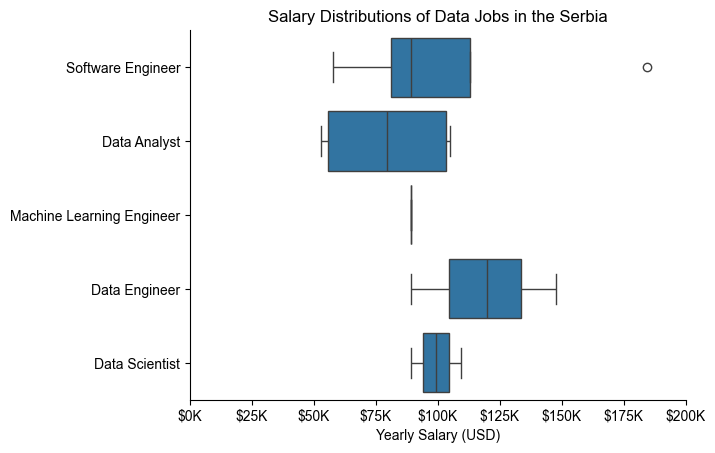

In [3]:
top_5 = df_Serbia['job_title_short'].value_counts().index[:5].to_list()
df_Serbia_top6 = df_Serbia[df_Serbia['job_title_short'].isin(top_5)]
sns.boxplot(data=df_Serbia_top6, x='salary_year_avg', y='job_title_short', order=top_5)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the Serbia')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 200000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


In [4]:
df_DA_Serbia = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Serbia')].copy()

df_DA_Serbia = df_DA_Serbia.dropna(subset=['salary_year_avg'])

df_DA_Serbia = df_DA_Serbia.explode('job_skills')

df_DA_Serbia[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
563959,53014.0,sql
563959,53014.0,r
563959,53014.0,sas
563959,53014.0,sas
563959,53014.0,python


In [5]:
df_DA_top_pay = df_DA_Serbia.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
ssis,1,105000.0
power bi,2,103750.0
go,1,102500.0
sql,3,102500.0
c#,2,79007.0
python,2,79007.0
excel,2,77757.0
oracle,1,56700.0
r,1,53014.0


In [6]:
df_DA_skills = df_DA_Serbia.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,2,103750.0
sql,3,102500.0
go,1,102500.0
c#,2,79007.0
python,2,79007.0
excel,2,77757.0
oracle,1,56700.0
sas,2,53014.0
r,1,53014.0


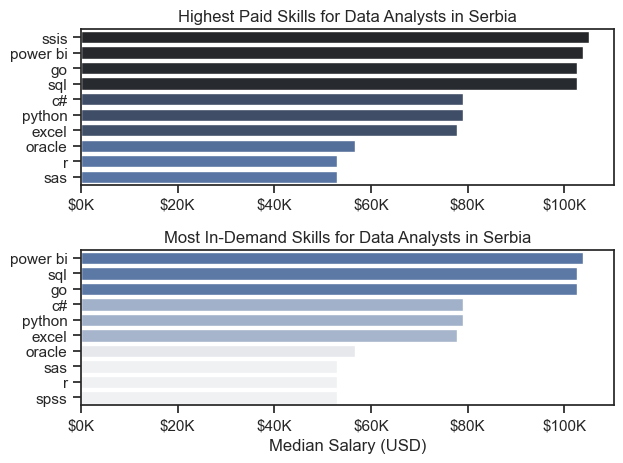

In [7]:
fig, ax = plt.subplots(2, 1)  

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Highest Paid Skills for Data Analysts in Serbia')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Most In-Demand Skills for Data Analysts in Serbia')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()